In [35]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from qiskit import QuantumCircuit
from qiskit.quantum_info import Statevector
from sklearn.preprocessing import LabelEncoder, StandardScaler

## Carregamento dos dados, análise exploratória e pré-processamento

In [36]:
# Carregamento dos dados
df = pd.read_csv("alzheimer.csv")

indexes = df[df['Group'] == "Converted"].index
df.drop(indexes, inplace=True)

In [37]:
# Análise exploratória
print('\nHead:')
print(df.head())

print('\nDataset Info:')
df.info()

print('\nMissing Values Count:')
display(df.isnull().sum())


Head:
         Group M/F  Age  EDUC  SES  MMSE  CDR  eTIV   nWBV    ASF
0  Nondemented   M   87    14  2.0  27.0  0.0  1987  0.696  0.883
1  Nondemented   M   88    14  2.0  30.0  0.0  2004  0.681  0.876
2     Demented   M   75    12  NaN  23.0  0.5  1678  0.736  1.046
3     Demented   M   76    12  NaN  28.0  0.5  1738  0.713  1.010
4     Demented   M   80    12  NaN  22.0  0.5  1698  0.701  1.034

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
Index: 336 entries, 0 to 372
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Group   336 non-null    object 
 1   M/F     336 non-null    object 
 2   Age     336 non-null    int64  
 3   EDUC    336 non-null    int64  
 4   SES     317 non-null    float64
 5   MMSE    334 non-null    float64
 6   CDR     336 non-null    float64
 7   eTIV    336 non-null    int64  
 8   nWBV    336 non-null    float64
 9   ASF     336 non-null    float64
dtypes: float64(5), int64(3), object(2

Group     0
M/F       0
Age       0
EDUC      0
SES      19
MMSE      2
CDR       0
eTIV      0
nWBV      0
ASF       0
dtype: int64

In [38]:
# Separação dos valores numéricos e categóricos para cleaning e tratamento de NaN's
numeric_cols = ['Age', 'EDUC', 'SES', 'MMSE', 'CDR', 'eTIV', 'nWBV', 'ASF']
categorical_cols = ['Group', 'M/F']

# Tratamento dos valores numéricos
for col in numeric_cols:
    if df[col].isnull().sum() > 0:
        median_val = df[col].median()
        df[col].fillna(median_val, inplace=True)
        print(f"Preenchimento da coluna {col} com os valores médios {median_val}")

# Tratamento dos valores categóricos
for col in categorical_cols:
    if df[col].isnull().sum() > 0:
        mode_val = df[col].mode()[0]
        df[col].fillna(mode_val, inplace=True)
        print(f"Preenchimento da coluna {col} com a moda dos valores '{mode_val}'")

# Nova checagem sobre valores faltantes
print('\nMissing values após tratamento:')
display(df[numeric_cols + categorical_cols].isnull().sum())

Preenchimento da coluna SES com os valores médios 2.0
Preenchimento da coluna MMSE com os valores médios 29.0

Missing values após tratamento:


/tmp/ipykernel_6955/2189618399.py:9: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(median_val, inplace=True)
/tmp/ipykernel_6955/2189618399.py:9: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'd

Age      0
EDUC     0
SES      0
MMSE     0
CDR      0
eTIV     0
nWBV     0
ASF      0
Group    0
M/F      0
dtype: int64

In [39]:
# Encoding das variáveis categóricas através do Label encoding
for col in categorical_cols:
    df[col] = LabelEncoder().fit_transform(df[col])
df

,Group,M/F,Age,EDUC,SES,MMSE,CDR,eTIV,nWBV,ASF
0,1,1,87,14,2.0,27.0,0.0,1987,0.696,0.883
1,1,1,88,14,2.0,30.0,0.0,2004,0.681,0.876
2,0,1,75,12,2.0,23.0,0.5,1678,0.736,1.046
3,0,1,76,12,2.0,28.0,0.5,1738,0.713,1.010
4,0,1,80,12,2.0,22.0,0.5,1698,0.701,1.034
...,...,...,...,...,...,...,...,...,...,...
368,0,1,82,16,1.0,28.0,0.5,1693,0.694,1.037
369,0,1,86,16,1.0,26.0,0.5,1688,0.675,1.040
370,1,0,61,13,2.0,30.0,0.0,1319,0.801,1.331
371,1,0,63,13,2.0,30.0,0.0,1327,0.796,1.323


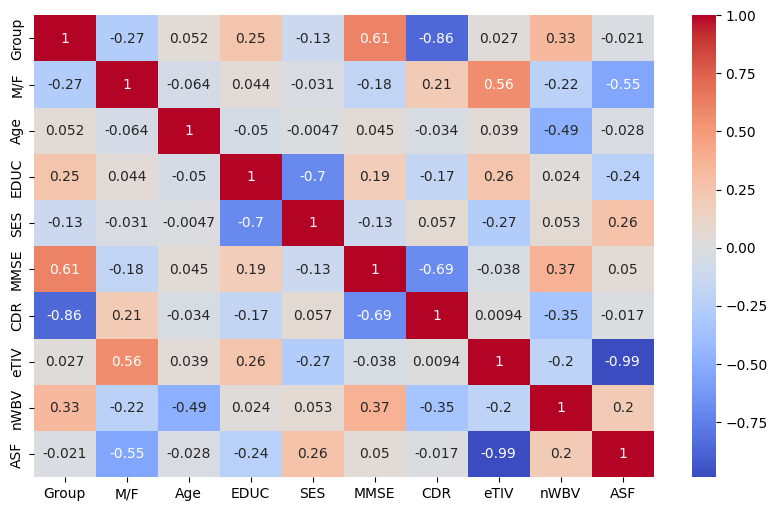

In [40]:
corr = df.corr()
plt.figure(figsize=(10, 6))
sns.heatmap(corr, annot=True, cmap='coolwarm')

scaler = StandardScaler()
numerical_features = ['Age', 'EDUC', 'SES', 'MMSE', 'CDR', 'eTIV', 'nWBV', 'ASF']
df[numerical_features] = scaler.fit_transform(df[numerical_features])

In [41]:
data = df.to_numpy()
data

array([[ 1.        ,  1.        ,  1.35316034, ...,  2.75887521,
        -0.91824816, -2.2074388 ],
       [ 1.        ,  1.        ,  1.48467954, ...,  2.85349191,
        -1.32085545, -2.25718867],
       [ 0.        ,  1.        , -0.22507006, ...,  1.03907755,
         0.15537126, -1.04897763],
       ...,
       [ 1.        ,  0.        , -2.06633886, ..., -0.95900452,
         1.90000283,  0.97655265],
       [ 1.        ,  0.        , -1.80330046, ..., -0.91447902,
         1.7658004 ,  0.91969566],
       [ 1.        ,  0.        , -1.54026206, ..., -0.88108489,
         1.90000283,  0.87705292]])

## Execução dos dados em um simulador quântico

In [98]:
from qiskit.circuit.library import ZZFeatureMap
from qiskit.circuit.library import RealAmplitudes
from qiskit_machine_learning.algorithms.classifiers import VQC
from qiskit_machine_learning.kernels import FidelityQuantumKernel
from qiskit_machine_learning.optimizers import COBYLA
from qiskit_machine_learning.state_fidelities import ComputeUncompute
from qiskit.primitives import StatevectorSampler as Sampler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.decomposition import PCA
from IPython.display import clear_output

In [43]:
# Passo 1: Preparação dos dados
y = data[:,0]
X = data[:, 1:]

# Passo 2: Divisão dos dados em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [44]:
num_features = X_train.shape[1]

feature_map = ZZFeatureMap(feature_dimension=num_features, reps=1)
ansatz = RealAmplitudes(num_qubits=num_features, reps=3)
optimizer = COBYLA(maxiter=10)
sampler = Sampler()

In [45]:
objective_func_vals = []
plt.rcParams["figure.figsize"] = [12, 6]

def callback(weights, obj_func_eval):
    clear_output(wait=True)
    objective_func_vals.append(obj_func_eval)
    plt.title("Objetivo vs Iteração")
    plt.xlabel("Iteração")
    plt.ylabel("Valor da função objetivo")
    plt.plot(range(len(objective_func_vals)), objective_func_vals)
    plt.show()

## Algoritmo QSVC

In [102]:
from sklearn.svm import SVC

In [ ]:
# Criação do Kernel
fidelity = ComputeUncompute(sampler=sampler)
quantum_kernel = FidelityQuantumKernel(feature_map=feature_map,fidelity=fidelity)

In [104]:
quantum_svc = SVC(kernel=quantum_kernel.evaluate)
quantum_svc.fit(X_train, y_train)

SVC(kernel=<bound method FidelityQuantumKernel.evaluate of <qiskit_machine_learning.kernels.fidelity_quantum_kernel.FidelityQuantumKernel object at 0x7e1cb0ebaa20>>)

In [105]:
results_quantum_svc = quantum_svc.predict(X_test)

In [106]:
print(f"Acurácia do modelo: {accuracy_score(y_test, results_quantum_svc)}")
print(f"Metricas do modelo: \n{metrics.classification_report(y_test, results_quantum_svc)}")

Acurácia do modelo: 0.6323529411764706
Metricas do modelo: 
              precision    recall  f1-score   support

         0.0       1.00      0.17      0.29        30
         1.0       0.60      1.00      0.75        38

    accuracy                           0.63        68
   macro avg       0.80      0.58      0.52        68
weighted avg       0.78      0.63      0.55        68



## Rede Neural VQC

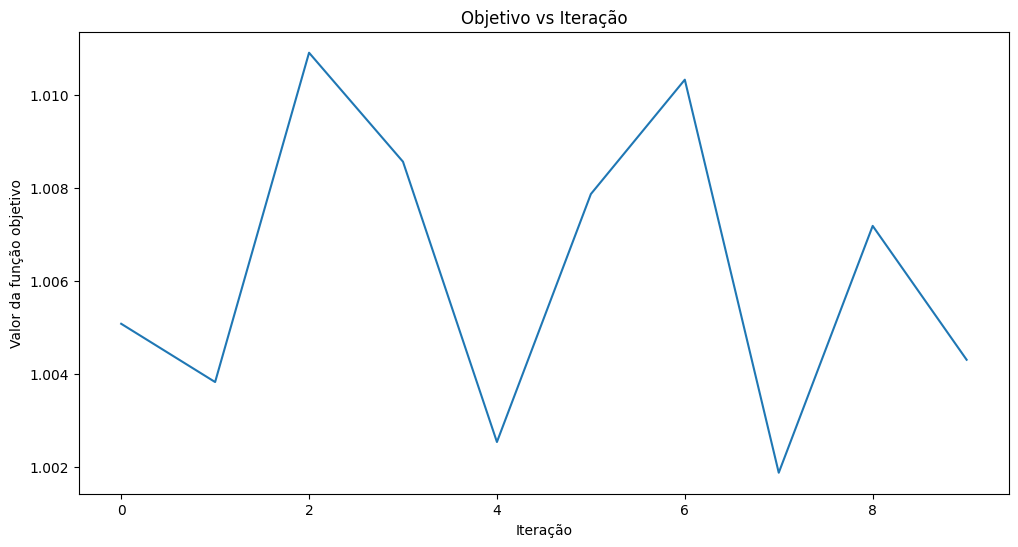

In [46]:
vqc = VQC(
    sampler=sampler,
    feature_map=feature_map,
    ansatz=ansatz,
    optimizer=optimizer,
    callback=callback
)

vqc.fit(X_train, y_train)

In [47]:
train_score = vqc.score(X_train, y_train)
test_score = vqc.score(X_test, y_test)

print(f"Quantum VQC on the training dataset: {train_score:.2f}")
print(f"Quantum VQC on the test dataset:     {test_score:.2f}")

Quantum VQC on the training dataset: 0.50
Quantum VQC on the test dataset:     0.49


## Abordagem Neurosimbólica

In [52]:
from sklearn import metrics

In [53]:
y_pred = vqc.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

In [54]:
print(y_pred)

[1. 1. 1. 0. 0. 0. 0. 0. 0. 0. 1. 1. 1. 0. 0. 0. 0. 0. 1. 1. 0. 0. 0. 0.
 0. 0. 0. 0. 1. 1. 0. 1. 1. 0. 0. 1. 0. 0. 0. 0. 0. 1. 0. 1. 1. 0. 1. 1.
 1. 0. 1. 1. 0. 1. 0. 1. 1. 1. 0. 0. 0. 1. 1. 0. 0. 1. 0. 1.]


In [94]:
''' Funções para diagnóstico neurosimbólico'''

def symbolic_rules(row):
    mmse = row[4]
    cdr = row[5]
    age = row[1]
    nwbv = row[7]
    asf = row[8]

    if mmse < 24:
        return 1
    if cdr > 0.5:
        return 0
    if age > 65 and mmse < 20:
        return 0
    if nwbv < 0.7 and asf > 1.1:
        return 0
    return 1

def neuro_quantum_diagnosis(row, neural_model):
    neural_pred = neural_model.predict(row.reshape(1, -1))
    print(f"Diagnóstico neural: {neural_pred}")
    return neural_pred

def symbolic_diagnosis(row):
    symbolic_diagnosis = symbolic_rules(row)
    print(f"Diagnóstico simbólico: {symbolic_diagnosis}")
    return symbolic_diagnosis

def ensemble_diagnosis(results_neuro_sample, results_symbolic_sample):
    if results_neuro_sample == results_symbolic_sample:
        return results_neuro_sample
    return results_symbolic_sample

In [95]:
results_neuro = np.array([neuro_quantum_diagnosis(row, vqc) for row in X_test])
results_symbolic = np.array([symbolic_diagnosis(row) for row in X_test])

y_pred = []

print(f"Resultados neurais: {results_neuro}")
print(f"Resultados simbólicos: {results_symbolic}")

vectorized_diagnosis = np.vectorize(ensemble_diagnosis)
y_pred = vectorized_diagnosis(results_neuro, results_symbolic)

Diagnóstico neural: 0.0
Diagnóstico neural: 1.0
Diagnóstico neural: 1.0
Diagnóstico neural: 1.0
Diagnóstico neural: 0.0
Diagnóstico neural: 0.0
Diagnóstico neural: 0.0
Diagnóstico neural: 0.0
Diagnóstico neural: 0.0
Diagnóstico neural: 0.0
Diagnóstico neural: 1.0
Diagnóstico neural: 1.0
Diagnóstico neural: 1.0
Diagnóstico neural: 1.0
Diagnóstico neural: 0.0
Diagnóstico neural: 1.0
Diagnóstico neural: 0.0
Diagnóstico neural: 1.0
Diagnóstico neural: 1.0
Diagnóstico neural: 1.0
Diagnóstico neural: 1.0
Diagnóstico neural: 1.0
Diagnóstico neural: 0.0
Diagnóstico neural: 0.0
Diagnóstico neural: 0.0
Diagnóstico neural: 0.0
Diagnóstico neural: 0.0
Diagnóstico neural: 1.0
Diagnóstico neural: 1.0
Diagnóstico neural: 0.0
Diagnóstico neural: 0.0
Diagnóstico neural: 1.0
Diagnóstico neural: 1.0
Diagnóstico neural: 1.0
Diagnóstico neural: 1.0
Diagnóstico neural: 1.0
Diagnóstico neural: 0.0
Diagnóstico neural: 0.0
Diagnóstico neural: 0.0
Diagnóstico neural: 0.0
Diagnóstico neural: 0.0
Diagnóstico neur

In [96]:
# Avaliação do modelo ensemble
print(f"Valor das métricas do classification_report:\n{metrics.classification_report(y_test, y_pred)}")

Valor das métricas do classification_report:
              precision    recall  f1-score   support

         0.0       0.00      0.00      0.00        30
         1.0       0.56      1.00      0.72        38

    accuracy                           0.56        68
   macro avg       0.28      0.50      0.36        68
weighted avg       0.31      0.56      0.40        68



/home/miguel/Estudo/Quantum Computing/.qml/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/miguel/Estudo/Quantum Computing/.qml/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/miguel/Estudo/Quantum Computing/.qml/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modif